<a href="https://colab.research.google.com/github/ayobamiakomolafe/Visualization-Charts-/blob/main/Pleiadas_Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
locations= '/content/drive/MyDrive/pleiades-locations-latest.csv.gz'

In [ ]:
df_locations=pd.read_csv(locations)

In [ ]:
df_locations.head(2)

In [ ]:
df_loc=df_locations[['title','id','tags','featureType','description','locationPrecision','timePeriods','reprLat', 'reprLong', 'reprLatLong']]

In [ ]:
df_cleaned=df_loc.fillna('Unknown')

In [ ]:
df_cleaned.head(2)

Visualization of the distribution of LocationPrecision using a Countplot

In [ ]:
df_cleaned['locationPrecision'].replace('Unknown', 'unlocated',inplace=True )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

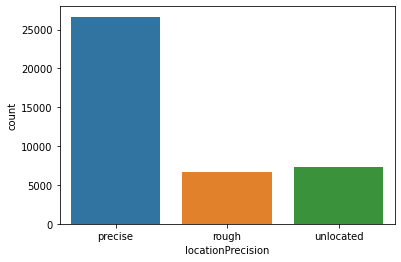

In [ ]:
sns.countplot(x ='locationPrecision', data = df_cleaned )
plt.savefig("countplot.png")
files.download("countplot.png")

Visualization of the distribution of different timeperiods using wafflecharts

In [ ]:
time_data=df_locations['timePeriods'].fillna(';')

In [ ]:
time_dict={'A':0, 'C':0, 'H':0, 'R':0,'L':0 }

In [ ]:
for i in time_data:
    if (len(i)==1) and (i in time_dict):
        time_dict[i]=time_dict[i]+1
    elif len(i)> 1:
        y=list(i)
        for r in y:
            if r in time_dict:
                time_dict[r]=time_dict[r]+1

In [ ]:
df1=pd.DataFrame(time_dict.keys())
df2=pd.DataFrame(time_dict.values())
df1.rename(columns={0:'timeperiods'}, inplace=True)
df3=pd.concat([df1,df2], axis=1)
df3.rename(columns={0:'counts'}, inplace=True)

In [ ]:
'Convert df3 to percentage'
df3['perc']=(df3['counts']/df3['counts'].sum()) * 100

In [ ]:
df3

In [ ]:
!pip install pywaffle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
  

  
# To plot the waffle Chart
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    title={'label': 'Distribution of Five Main Time-periods', 'loc': 'left'},
    values = df3.perc,
    labels = ['{} {:.1f}%'.format(k, v) for k, v in zip(df3.timeperiods,df3.perc)], 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(df3.perc),'fontsize': 12, 'framealpha': 0},
    figsize=(13,8)
)
plt.savefig("waffleplot2.png")
files.download("waffleplot2.png")

Visualization of distribution for top 10 feature types

In [ ]:
df_featureType=df_loc['featureType'].value_counts().to_frame()

In [ ]:
df_featureType=df_featureType.reset_index()

In [ ]:
df_featureType=df_featureType.iloc[:11]

In [ ]:
df_featureType.rename(columns={'index':'Name'}, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

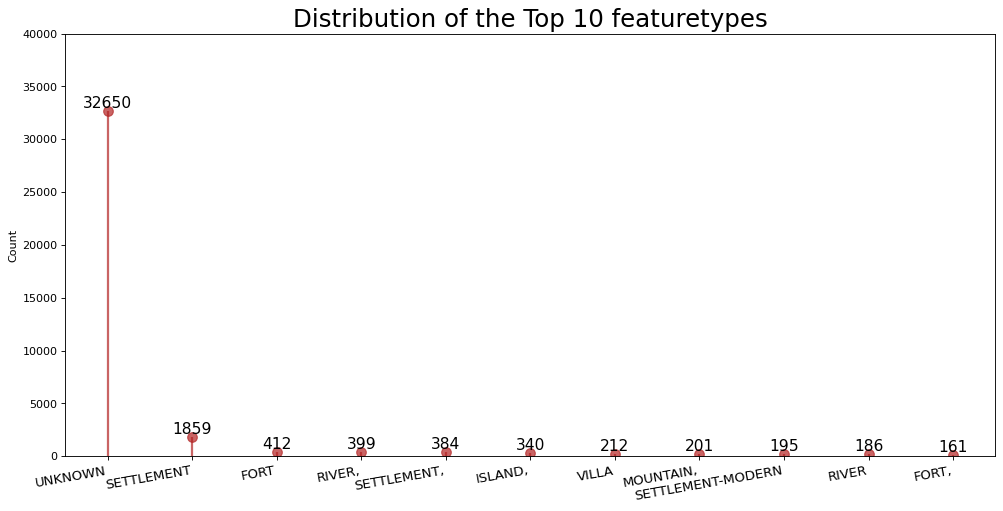

In [ ]:
fig, ax = plt.subplots(figsize=(15,7), dpi= 80)
ax.vlines(x=df_featureType.Name, ymin=0, ymax=df_featureType.featureType, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_featureType.Name, y=df_featureType.featureType, s=75, color='firebrick', alpha=0.7)
ax.set_title('Distribution of the Top 10 featuretypes', fontdict={'size':22})
ax.set_ylabel('Count')
ax.set_xticks(df_featureType.index)
ax.set_xticklabels(df_featureType.Name.str.upper(), rotation=10, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 40000)
for row in df_featureType.itertuples():
    ax.text(row.Index, row.featureType +.5, s=round(row.featureType, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.savefig("lollipop.png")
files.download("lollipop.png")

Map visualization

In [ ]:
! pip install folium

In [ ]:
df_map=df_loc[['reprLatLong','tags', 'id', 'reprLat','reprLong']]

In [ ]:
df_map.fillna('Unknown', inplace=True)
df_map=df_map[df_map['reprLatLong']!='Unknown']

In [ ]:
df_view=df_map[df_map['tags']=='extant remains']
df_view.shape

(21, 5)

In [ ]:
df_view.head(21)

In [ ]:
m = folium.Map(location=[37.974038,23.7261021], zoom_start=13)
tooltip = "Click me!"

folium.Marker(
    [37.974038,23.7261021], popup="<i>osm-location-of-the-roman-agora</i>", tooltip=tooltip
).add_to(m)



In [ ]:
m

A dendrogram of the extant sites based on longitude and latititude

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df_clust=df_view[['reprLat', 'reprLong']]

In [ ]:
df_view.id

In [ ]:
Z = linkage(df_clust, 'ward')

In [ ]:
dendrogram(Z)
plt.savefig("dend.png")
files.download("dend.png")